In [1]:
from datetime import datetime
import pandas_datareader.data as wb

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime(2012,1,1)
end = datetime(2019,12,31)
 
df = wb.DataReader('GOOG','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780
...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015


In [3]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
ts = df.Close

# Scaling (MinMaxScaler between 0 and 1 )

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1))
ts = scaler.fit_transform(ts.values.reshape(-1,1))

# Split x and y (with appropriate time steps)

In [7]:
x_list = []
y_list = []
for i in range(2011-60):
    x_list.append(ts[i:i+60,0])
    y_list.append(ts[i+60,0])
x = np.array(x_list)
y = np.array(y_list)

### 함수로 만들어 다른곳에서도 쓸 수 있게 함.

In [20]:
def data_prep(sample ,t):
    x_list = []
    y_list = []
    for i in range(sample-t):
        x_list.append(ts[i:i+t,0])
        y_list.append(ts[i+t,0])
    x = np.array(x_list)
    y = np.array(y_list)
    return x,y

In [21]:
data_prep(20,3)

(array([[0.04893503, 0.0502555 , 0.04599047],
        [0.0502555 , 0.04599047, 0.04185427],
        [0.04599047, 0.04185427, 0.02917423],
        [0.04185427, 0.02917423, 0.0294871 ],
        [0.02917423, 0.0294871 , 0.03078454],
        [0.0294871 , 0.03078454, 0.03247767],
        [0.03078454, 0.03247767, 0.03033826],
        [0.03247767, 0.03033826, 0.03198998],
        [0.03033826, 0.03198998, 0.03398217],
        [0.03198998, 0.03398217, 0.03704636],
        [0.03398217, 0.03704636, 0.0123948 ],
        [0.03704636, 0.0123948 , 0.01217855],
        [0.0123948 , 0.01217855, 0.01006676],
        [0.01217855, 0.01006676, 0.00480335],
        [0.01006676, 0.00480335, 0.00416382],
        [0.00480335, 0.00416382, 0.00962967],
        [0.00416382, 0.00962967, 0.00857607]]),
 array([0.04185427, 0.02917423, 0.0294871 , 0.03078454, 0.03247767,
        0.03033826, 0.03198998, 0.03398217, 0.03704636, 0.0123948 ,
        0.01217855, 0.01006676, 0.00480335, 0.00416382, 0.00962967,
        0.00

# Split train and test (80%, 2/3, etc.)

In [8]:
x_train = x[:int(len(x)*(2/3))]
x_test = x[int(len(x)*(2/3)):]

In [9]:
y_train = y[:int(len(y)*(2/3))]
y_test = y[int(len(y)*(2/3)):]

In [10]:
print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test:{y_test.shape}')

x_train: (1300, 60)
x_test: (651, 60)

y_train: (1300,)
y_test:(651,)


# Reshape an input to 3D with the format of [samples, time steps and features]

In [11]:
x_train = x_train.reshape(1300, 60, 1)
x_test = x_test.reshape(651, 60, 1)

# Building the RNN LSTM model using sequential model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(LSTM(50, input_shape=(60,1), return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(50))
model.add(Dropout(.2))
model.add(Dense(1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compile with adam optimizer and mean_squared_error loss

In [14]:
model.compile(optimizer='adam',
              loss = 'mse')

# Fit the model (20 epochs and 32 batch size)

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    epochs = 20, 
                    batch_size=32,
                    validation_data=(x_test, y_test)) #epochs = 100

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1300 samples, validate on 651 samples
Epoch 1/20





1300/1300 [==============================] - 20s 15ms/step - loss: 0.0147 - val_loss: 0.0119
Epoch 2/20
1300/1300 [==============================] - 16s 12ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 3/20
1300/1300 [==============================] - 15s 12ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 4/20
1300/1300 [==============================] - 16s 12ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/20
1300/1300 [==============================] - 15s 11ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 6/20
1300/1300 [==============================] - 15s 11ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/20
1300/1300 [==============================] - 15s 12ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/20
1300/1300 [==============================] - 15s 12ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 9/20
1300/130

# Predict with x_train and x_test and inverse transform

In [16]:
y_pred_test = scaler.inverse_transform(model.predict(x_test))
y_pred_train = scaler.inverse_transform(model.predict(x_train))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1,1))

# Calculate the root mean squared error

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.metrics import mean_squared_error
mse_test = np.sqrt(mean_squared_error(y_test_inverse, 
                                      y_pred_test))
mse_train = np.sqrt(mean_squared_error(y_train_inverse, 
                                       y_pred_train))
model.evaluate(x_test, y_test)

651/651 [==============================] - 2s 3ms/step


0.0012485417496261348

# Visualize the result (vstack and plt.plot)

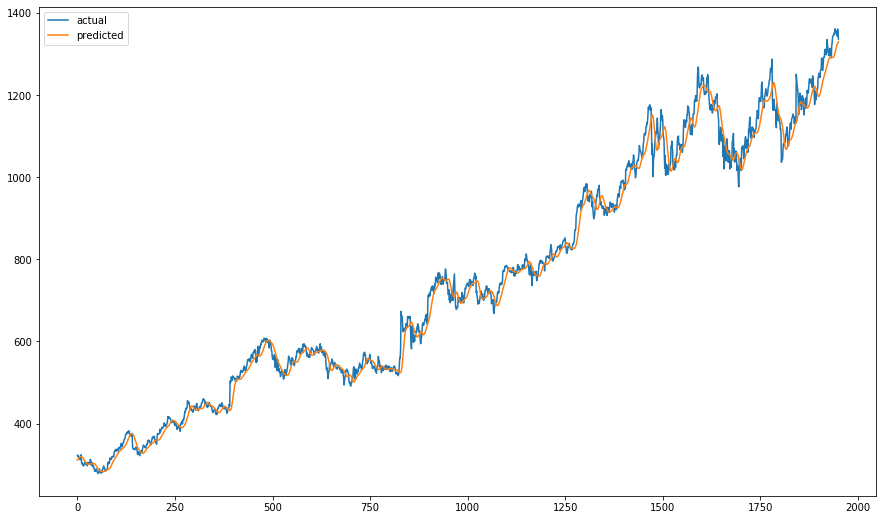

In [23]:
plt.figure(figsize=(15,9))
plt.plot(np.vstack((y_train_inverse, y_test_inverse)), label='actual')
plt.plot(np.vstack((y_pred_train, y_pred_test)), label='predicted')
plt.legend()